<a href="https://colab.research.google.com/github/slisovych/machine_learning_hometasks/blob/main/HW_2_2_%D0%9B%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B7_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-2). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


In [3]:
od.version()

'0.1.22'

In [4]:
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-2/data?select=train.csv'

In [5]:
od.download(dataset_url)

Skipping, found downloaded files in "./bank-customer-churn-prediction-dlu-course-c-2" (use force=True to force download)


In [6]:
import os
data_dir = './bank-customer-churn-prediction-dlu-course-c-2'
os.listdir(data_dir)

['test.csv', 'sample_submission.csv', 'train.csv']

In [7]:
train_csv = data_dir + '/train.csv'

In [8]:
raw_df = pd.read_csv(train_csv)
raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


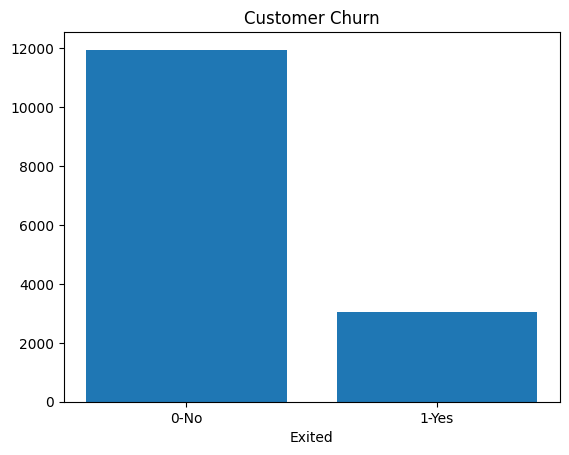

In [10]:
exit_counts = raw_df['Exited'].value_counts()

plt.bar(exit_counts.index, exit_counts.values)
plt.xticks(exit_counts.index, ['0-No', '1-Yes'])

plt.xlabel("Exited")
plt.title("Customer Churn")
plt.show()

In [11]:
#?train_test_split

In [12]:
raw_df.drop(columns=['CustomerId'], inplace=True)

In [13]:
y = raw_df['Exited']
train_df, val_df = train_test_split(raw_df, stratify=y, test_size=0.25, random_state=42)
train_df.shape, val_df.shape


((11250, 13), (3750, 13))

2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [14]:
input_cols = list(train_df.columns)[:-1]
target_col = 'Exited'
train_inputs, train_targets = train_df[input_cols].copy(), train_df[target_col].copy()
val_inputs, val_targets = val_df[input_cols].copy(), val_df[target_col].copy()

print (input_cols)
print (target_col)

['id', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Exited


In [15]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)

train_inputs: (11250, 12)
train_targets: (11250,)
val_inputs: (3750, 12)
val_targets: (3750,)


3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [16]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

numeric_cols, categorical_cols

(['id',
  'CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 ['Surname', 'Geography', 'Gender'])

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [17]:
train_inputs[numeric_cols].describe()

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000,11250.000000
mean,7472.640889,658.990133,37.688267,5.023467,42952.888064,1.589689,0.792000,0.491111,117904.955965
std,4328.352030,72.120043,8.143175,2.781807,59923.385440,0.531688,0.405895,0.499943,45553.025877
min,0.000000,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,3734.250000,603.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,83155.870000
50%,7447.500000,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,123587.945000
75%,11208.750000,709.000000,42.000000,7.000000,109863.192500,2.000000,1.000000,1.000000,156774.940000
max,14999.000000,850.000000,72.000000,10.000000,209767.310000,4.000000,1.000000,1.000000,199992.480000


In [18]:
train_inputs[numeric_cols].isna().sum()

,0
id,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [19]:
train_inputs[categorical_cols].nunique()


,0
Surname,720
Geography,3
Gender,2


In [20]:
#train_inputs = train_df.drop(columns=['id', 'Surname'])
#val_inputs = val_df.drop(columns=['id', 'Surname'])

In [21]:
numeric_cols = [col for col in numeric_cols if col not in ['id', 'Surname']]
categorical_cols = [col for col in categorical_cols if col not in ['id', 'Surname']]

In [22]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [23]:
train_inputs[numeric_cols].describe().round(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00
mean,0.54,0.36,0.50,0.20,0.20,0.79,0.49,0.59
std,0.17,0.15,0.28,0.29,0.18,0.41,0.50,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.41,0.26,0.30,0.00,0.00,1.00,0.00,0.42
50%,0.55,0.35,0.50,0.00,0.33,1.00,0.00,0.62
75%,0.66,0.44,0.70,0.52,0.33,1.00,1.00,0.78
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [24]:
train_inputs[categorical_cols].nunique()

,0
Geography,3
Gender,2


In [25]:
val_inputs[categorical_cols].nunique()

,0
Geography,3
Gender,2


In [26]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male']

In [27]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [28]:
pd.set_option('display.max_columns', None)
display(train_inputs.head())
display(val_inputs.head())

,id,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8263,8263,Toscani,0.632458,France,Male,0.259259,0.5,0.622726,0.000000,1.0,1.0,0.433916,1.0,0.0,0.0,0.0,1.0
14199,14199,Kuo,0.479714,Germany,Female,0.259259,0.4,0.571232,0.000000,1.0,0.0,0.888712,0.0,1.0,0.0,1.0,0.0
1856,1856,Ejimofor,0.591885,France,Female,0.074074,0.4,0.000000,0.333333,1.0,1.0,0.813017,1.0,0.0,0.0,1.0,0.0
3013,3013,Onochie,0.653938,France,Male,0.555556,0.3,0.000000,0.333333,1.0,0.0,0.599071,1.0,0.0,0.0,0.0,1.0
8266,8266,Chukwuemeka,0.632458,France,Female,0.314815,0.7,0.000000,0.333333,1.0,0.0,0.502109,1.0,0.0,0.0,1.0,0.0


,id,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1855,1855,Bitter,0.267303,France,Male,0.203704,0.9,0.570579,0.0,0.0,0.0,0.279047,1.0,0.0,0.0,0.0,1.0
1273,1273,Ting,0.398568,Germany,Male,0.425926,0.3,0.590481,0.0,1.0,0.0,0.884371,0.0,1.0,0.0,0.0,1.0
5414,5414,Maclean,0.453461,France,Male,0.240741,0.7,0.000000,0.0,1.0,1.0,0.751226,1.0,0.0,0.0,0.0,1.0
10923,10923,Chiang,0.396181,France,Male,0.703704,0.3,0.000000,1.0,1.0,0.0,0.514675,1.0,0.0,0.0,0.0,1.0
5835,5835,Oluchi,0.758950,Spain,Female,0.444444,0.5,0.000000,0.0,1.0,1.0,0.909003,0.0,0.0,1.0,1.0,0.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [29]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)

train_inputs: (11250, 17)
train_targets: (11250,)
val_inputs: (3750, 17)
val_targets: (3750,)


In [30]:
!pip install pyarrow --quiet

In [31]:
# Визначення шляху для збереження файлів
save_dir = '/mnt/data/model_data/'

# Створення директорії, якщо вона не існує
os.makedirs(save_dir, exist_ok=True)

# Збереження даних у форматі parquet
train_inputs.to_parquet(os.path.join(save_dir,'train_inputs.parquet'))
val_inputs.to_parquet(os.path.join(save_dir,'val_inputs.parquet'))
pd.DataFrame(train_targets).to_parquet(os.path.join(save_dir,'train_targets.parquet'))
pd.DataFrame(val_targets).to_parquet(os.path.join(save_dir,'val_targets.parquet'))

In [32]:
os.listdir(save_dir)


['train_inputs.parquet',
 'val_targets.parquet',
 'val_inputs.parquet',
 'train_targets.parquet']

6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import joblib

X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8263,0.632458,0.259259,0.5,0.622726,0.000000,1.0,1.0,0.433916,1.0,0.0,0.0,0.0,1.0
14199,0.479714,0.259259,0.4,0.571232,0.000000,1.0,0.0,0.888712,0.0,1.0,0.0,1.0,0.0
1856,0.591885,0.074074,0.4,0.000000,0.333333,1.0,1.0,0.813017,1.0,0.0,0.0,1.0,0.0
3013,0.653938,0.555556,0.3,0.000000,0.333333,1.0,0.0,0.599071,1.0,0.0,0.0,0.0,1.0
8266,0.632458,0.314815,0.7,0.000000,0.333333,1.0,0.0,0.502109,1.0,0.0,0.0,1.0,0.0


In [34]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [35]:
model.coef_.round(2)

array([[-0.83,  8.16, -0.09, -1.09, -3.93, -0.18, -1.24,  0.18, -0.97,
         0.6 , -1.05, -0.27, -1.15]])

In [36]:
print(model.intercept_)

[-1.42098682]


In [37]:
train_preds = model.predict(X_train)
train_preds


array([0., 0., 0., ..., 0., 0., 0.])

In [38]:
val_preds = model.predict(X_val)
val_preds

array([0., 1., 0., ..., 0., 0., 0.])

7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

In [39]:
#train_probs = model.predict_proba(X_train)[:, 1]
#val_probs = model.predict_proba(X_val)[:, 1]

#train_pred = (train_probs >= 0.5).astype(int)
#val_pred = (val_probs >= 0.5).astype(int)

F1 score: 63.79%
F1 score: 63.39%


array([0., 1., 0., ..., 0., 0., 0.])

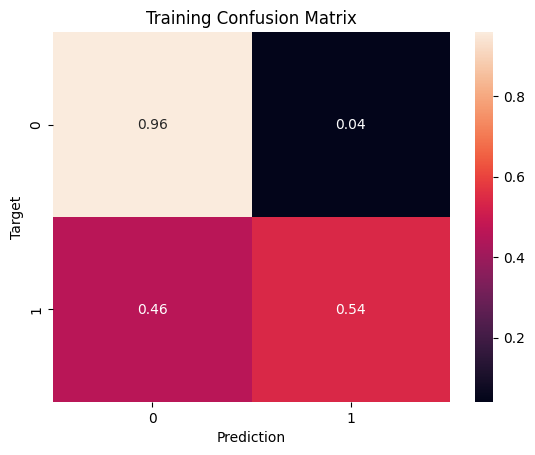

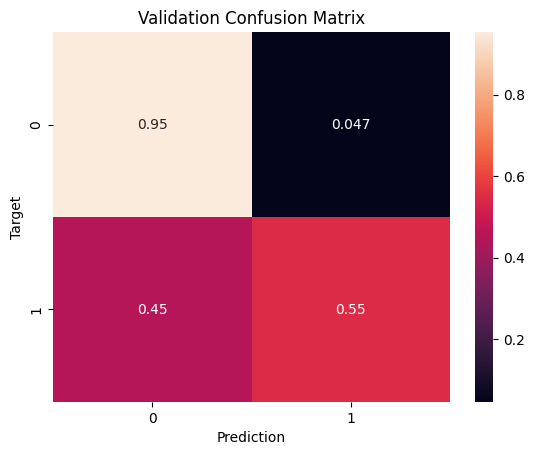

In [40]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_targets, train_preds)

def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    f1 = f1_score(targets, preds, pos_label=1)
    print("F1 score: {:.2f}%".format(f1 * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    return preds

predict_and_plot(X_train, train_targets, name='Training')
predict_and_plot(X_val, val_targets, name='Validation')

AUROC for Training: 0.88


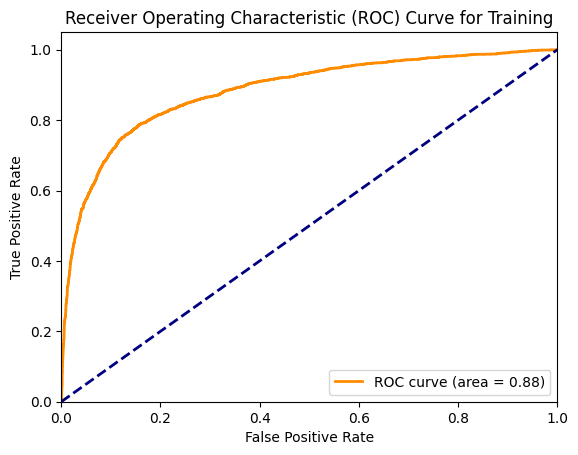

AUROC for Validation: 0.88


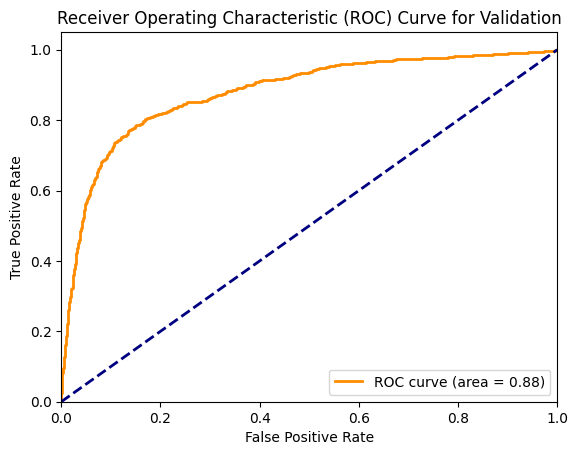

In [44]:
from sklearn.metrics import roc_curve, auc

def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.2f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Validation')

Значення AUROC для навчальної та валідаційної вибірок становить 0.88, що є доволі хорошим показником. Це свідчить про те, що модель добре розрізняє позитивний та негативний класи.

Форма ROC-кривої демонструє, що модель має високу чутливість (True Positive Rate) при низькому рівні хибних позитивів (False Positive Rate).

F1 Score на рівні ~63% показує, що модель має помірний баланс між точністю (precision) і повнотою (recall).

Модель схильна до пропуску позитивних класів (FN=46%), що може бути проблемою в реальних умовах, можливо, треба спробувати інші пороги класифікації.

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [48]:
majority_class = train_targets.value_counts().idxmax()

# Створення передбачень для моделі, яка завжди передбачає мажоритарний клас
train_majority_pred = [majority_class] * len(train_targets)
val_majority_pred = [majority_class] * len(val_targets)


In [51]:
from sklearn.metrics import accuracy_score

print (accuracy_score(train_targets, train_preds))
print (accuracy_score(val_targets, val_preds))
print (accuracy_score(train_targets, train_majority_pred))
print (accuracy_score(val_targets, val_majority_pred))

0.8747555555555555
0.8709333333333333
0.7965333333333333
0.7965333333333333


Натренована модель має на 7.1% вищу точність на тренувальних даних та на 7.44% вищу на валідаційних даних, ніж модель, яка завжди передбачає мажоритарний клас.
Це свідчить про те, що модель здатна краще розрізняти класи та приносить певну користь порівняно з базовою стратегією.

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [52]:
import joblib

In [55]:
log_reg = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}
joblib.dump(log_reg, 'log_reg.joblib')
model_2 = joblib.load('log_reg.joblib')

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [56]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [57]:
predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, raw_df[:5])

array([0.00642569, 0.03706968, 0.36971138, 0.37670638, 0.97583457])

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [60]:
test_csv = data_dir + '/test.csv'
test_raw_df = pd.read_csv(test_csv)
test_raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
1,15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
2,15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
3,15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
4,15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,15642997.0,Chukwumaobim,639.0,Spain,Male,38.0,10.0,0.00,2.0,1.0,1.0,49637.65
9996,24996,15739271.0,Clements,678.0,Spain,Male,39.0,9.0,0.00,2.0,1.0,1.0,142513.50
9997,24997,15756743.0,Chidiebere,774.0,France,Male,30.0,9.0,0.00,2.0,1.0,0.0,4861.72
9998,24998,15680167.0,Yermakova,595.0,France,Male,38.0,6.0,144875.79,1.0,1.0,0.0,126469.09


In [61]:
# Перевірка наявності необхідних колонок перед трансформацією
if all(col in test_raw_df.columns for col in numeric_cols + categorical_cols):
    # Застосування функції для отримання передбачень
    test_raw_df['Exited'] = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_raw_df)
else:
    print("Деякі колонки відсутні у файлі test.csv. Перевірте вхідні дані.")

# Виведення перших кількох рядків датафрейму з новою колонкою Exited
test_raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,15000,15594796.0,Chu,0.365155,Germany,Male,0.222222,0.2,0.696265,0.000000,1.0,1.0,0.789477,0.0,1.0,0.0,0.0,1.0,0.074950
1,15001,15642821.0,Mazzi,0.286396,France,Male,0.388889,0.5,0.000000,0.333333,1.0,1.0,0.337131,1.0,0.0,0.0,0.0,1.0,0.034767
2,15002,15716284.0,Onyekachi,0.656325,France,Male,0.462963,0.8,0.000000,0.333333,1.0,0.0,0.783859,1.0,0.0,0.0,0.0,1.0,0.150961
3,15003,15785078.0,Martin,0.682578,Spain,Male,0.500000,0.3,0.000000,0.000000,1.0,1.0,0.834571,0.0,0.0,1.0,0.0,1.0,0.196458
4,15004,15662955.0,Kenechukwu,0.384248,Spain,Male,0.462963,0.8,0.000000,0.333333,1.0,1.0,0.718421,0.0,0.0,1.0,0.0,1.0,0.055247


12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [62]:
submission_csv = data_dir + '/sample_submission.csv'
submission_log_reg = pd.read_csv(submission_csv)
submission_log_reg
submission_log_reg

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5
...,...,...
9995,24995,0.5
9996,24996,0.5
9997,24997,0.5
9998,24998,0.5


In [70]:
submission_log_reg['Exited'] = test_raw_df['Exited'].values

submission_log_reg.head()

# Збереження у файл без індексів
output_submission_path = '/mnt/data/submission_log_reg.csv'
submission_log_reg.to_csv(output_submission_path, index=False)